# First look at the AirBnB datasets

In [4]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import os
from jupyterthemes import jtplot
from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
jtplot.style(theme='solarizedd')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

ROOT_DIR = '..'
DATA_DIR = os.path.join(ROOT_DIR, 'data')
SRC_DIR = os.path.join(ROOT_DIR, 'src')

SEATTLE_CALENDAR = os.path.join(DATA_DIR, 'seattle', 'calendar.csv')
SEATTLE_LISTINGS = os.path.join(DATA_DIR, 'seattle', 'listings.csv')
SEATTLE_REVIEWS = os.path.join(DATA_DIR, 'seattle', 'reviews.csv')

import sys
sys.path.append(SRC_DIR)

In [8]:
calendar = pd.read_csv(SEATTLE_CALENDAR)
listings = pd.read_csv(SEATTLE_LISTINGS)
reviews = pd.read_csv(SEATTLE_REVIEWS)

## Business Understanding: What is AirBnB?

In [12]:
# TODO: Explain

Inspiration

    Can you describe the vibe of each Seattle neighborhood using listing descriptions?
    What are the busiest times of the year to visit Seattle? By how much do prices spike?
    Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

For more ideas, visualizations of all Seattle datasets can be found here.

## What input data is available?

In [11]:
print(calendar.shape)
calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [30]:
print(listings.shape)
listings.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [33]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [34]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [14]:
print(reviews.shape)
reviews.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


There is a "listings" table which is static, and two "time series" tables: "calendar", which has about 1.4 millon rows, and "reviews" with about 85000.

In [15]:
calendar.date.describe()

count        1393570
unique           365
top       2016-01-23
freq            3818
Name: date, dtype: object

In [16]:
print(calendar.date.min())
print(calendar.date.max())

2016-01-04
2017-01-02


In [17]:
reviews.date.describe()

count          84849
unique          1930
top       2015-09-21
freq             580
Name: date, dtype: object

In [18]:
print(reviews.date.min())
print(reviews.date.max())

2009-06-07
2016-01-03


So, the time periods are not the same and they do not overlap. I assume the dataset was gathered at the begining of 2016, and that "calendar" represents the current reservations for the next year. That is confirmed by the "last_scrapped" column of the listings table.

### Missing data

In [19]:
calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

So, 32% of the prices are missing. Do those missing prices coincide with the t or f label?

In [23]:
calendar.available[calendar.price.isnull()].value_counts()

f    459028
Name: available, dtype: int64

Indeed, all the missing prices are for properties that are not available. That could mean that they are not currently being offered in the site.

What about the other way round? Do all the properties with "f" have a missing price?

In [91]:
calendar.price[calendar.available=='f'].value_counts(dropna=False)

NaN    459028
Name: price, dtype: int64

Yes! Indeed the NaN IS the default value for a property that is not available!

In [26]:
reviews.isnull().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

There are some very few comments missing. About 0.02%. Doesn't look relevant.

In [27]:
reviews[reviews.comments.isnull()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
11034,461567,11614247,2014-04-09,12120141,Abbey,NaN
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN
29467,1018204,10024984,2014-01-26,10571694,Jordan,NaN
30619,6079216,34824019,2015-06-12,31556342,Mack,NaN
31414,3354614,18103248,2014-08-21,12426758,Jeff,NaN
35210,3554558,24863045,2015-01-03,24488791,Eleanor,NaN
37971,1790020,15640556,2014-07-13,16884291,Michael,NaN


Those are too few rows, and they don't give any useful information, so I will drop them.

In [29]:
reviews = reviews.dropna()

In [37]:
listings.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

There are some columns with a lot of missing data in "listings". In particular the "license" column, probably should be removed.
On the other hand, the "price" column has no missing data. Those values could be used to fill the calendar table, but they may not be updated. I assume the "price" in listings is the last one known, while the calendar table has the full price history.

### Let's try to see the price evolution of one property

In [54]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Oh, let's convert the prices to numbers!

In [77]:
def prices_to_num(price_str):
    """ Converts a price like $67.0 to a float (67.0)"""
    if price_str is np.nan:
        return np.nan
    return float(price_str[1:].replace(',',''))

In [78]:
calendar['price'] = calendar['price'].apply(prices_to_num)

In [79]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [80]:
most_frequent = calendar.groupby('listing_id').count().sort_values(by='price', ascending=False)
most_frequent.head()

,date,available,price
listing_id,,,
8118346,365,365,365
9281758,365,365,365
8868025,365,365,365
4317390,365,365,365
4316910,365,365,365


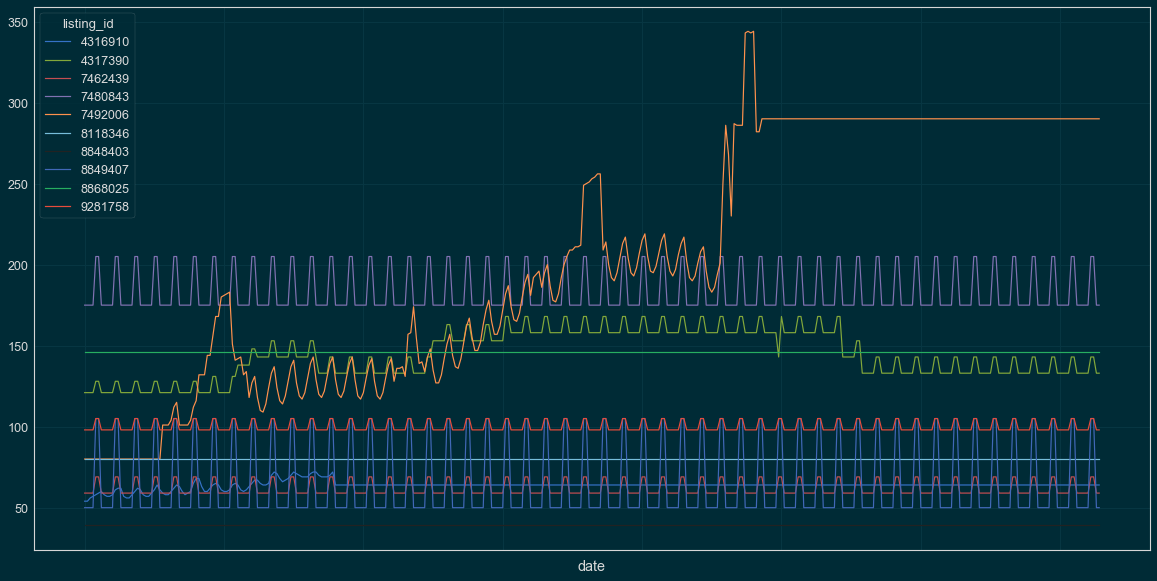

In [85]:
mf_cal = calendar[calendar.listing_id.isin(most_frequent.index[:10])]
mf_cal.pivot_table(values='price', index='date', columns='listing_id').plot()

Interesting! It looks like the prices do change, and they seem to have a weekly period (possibly hardcoded). Some of the properties have a flat rate, others make minor manual changes, but there is at least one that seems to have a dynamic rate (possibly automatically adjusted).

### Let's fill the missing prices using the closest price in time, or the listings table price, if no one is available in calendar. Before that, are there any properties that are never available?

In [101]:
not_available = calendar.groupby('listing_id')['available'].apply(
    lambda x: (x=='f').all()).sort_values(ascending=False)

In [108]:
not_available.shape

(3818,)

In [110]:
not_a_ids = [idx for idx in not_available.index if not_available[idx]]
len(not_a_ids)

95

In [113]:
calendar[calendar.listing_id.isin(not_a_ids)].isnull().shape

(34675, 4)

In [114]:
calendar[calendar.listing_id.isin(not_a_ids)].isnull().sum()

listing_id        0
date              0
available         0
price         34675
dtype: int64

Then 95 properties are never available in the period.

In [115]:
(calendar.available == 'f').sum()

459028

But many more (about 459000) become available and not available from time to time.